In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Question 1: Tree-based Classifiers and Ensembles 
## Part 1 CM1

In [2]:
df_old = pd.read_csv('C:\\Users\\mps\\OneDrive - University of Waterloo\\Documents\\657A\\A2\\A2\\seed\\seeds_dataset.txt', sep="\t", error_bad_lines=False, warn_bad_lines=True, header=None)

df_old.columns=['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove','target']


b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


While importing the dataset, we noticed few lines with incorrect format. We have rectified those lines outside and imported the corrected dataset below retaining all the rows.

In [3]:
df = pd.read_csv('C:\\Users\\mps\\OneDrive - University of Waterloo\\Documents\\657A\\A2\\A2\\seed\\seeds_dataset_CORRECTED.txt', sep="\t", error_bad_lines=False, warn_bad_lines=True, header=None)

# To construct the data, seven geometric parameters of wheat kernels were measured:
# 1. area A,
# 2. perimeter P,
# 3. compactness C = 4*pi*A/P^2,
# 4. length of kernel,
# 5. width of kernel,
# 6. asymmetry coefficient
# 7. length of kernel groove.

# target (three different varieties of wheat): Kama (1), Rosa (2) and Canadian (3)

df.columns=['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove','target']


In [4]:
df.shape

(210, 8)

In [5]:
df.dtypes

area                       float64
perimeter                  float64
compactness                float64
length_kernel              float64
width_kernel               float64
asymmetry_coeff            float64
length_of_kernel_groove    float64
target                       int64
dtype: object

In [6]:
df.head()

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [7]:
df.describe()

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,209.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700439,5.410024,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503402,0.491843,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.224000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


Based on the count, we noticed that there is a missing value in column "length_of_kernal_groove" of the data.

In [8]:
df['target'].value_counts()

3    70
2    70
1    70
Name: target, dtype: int64

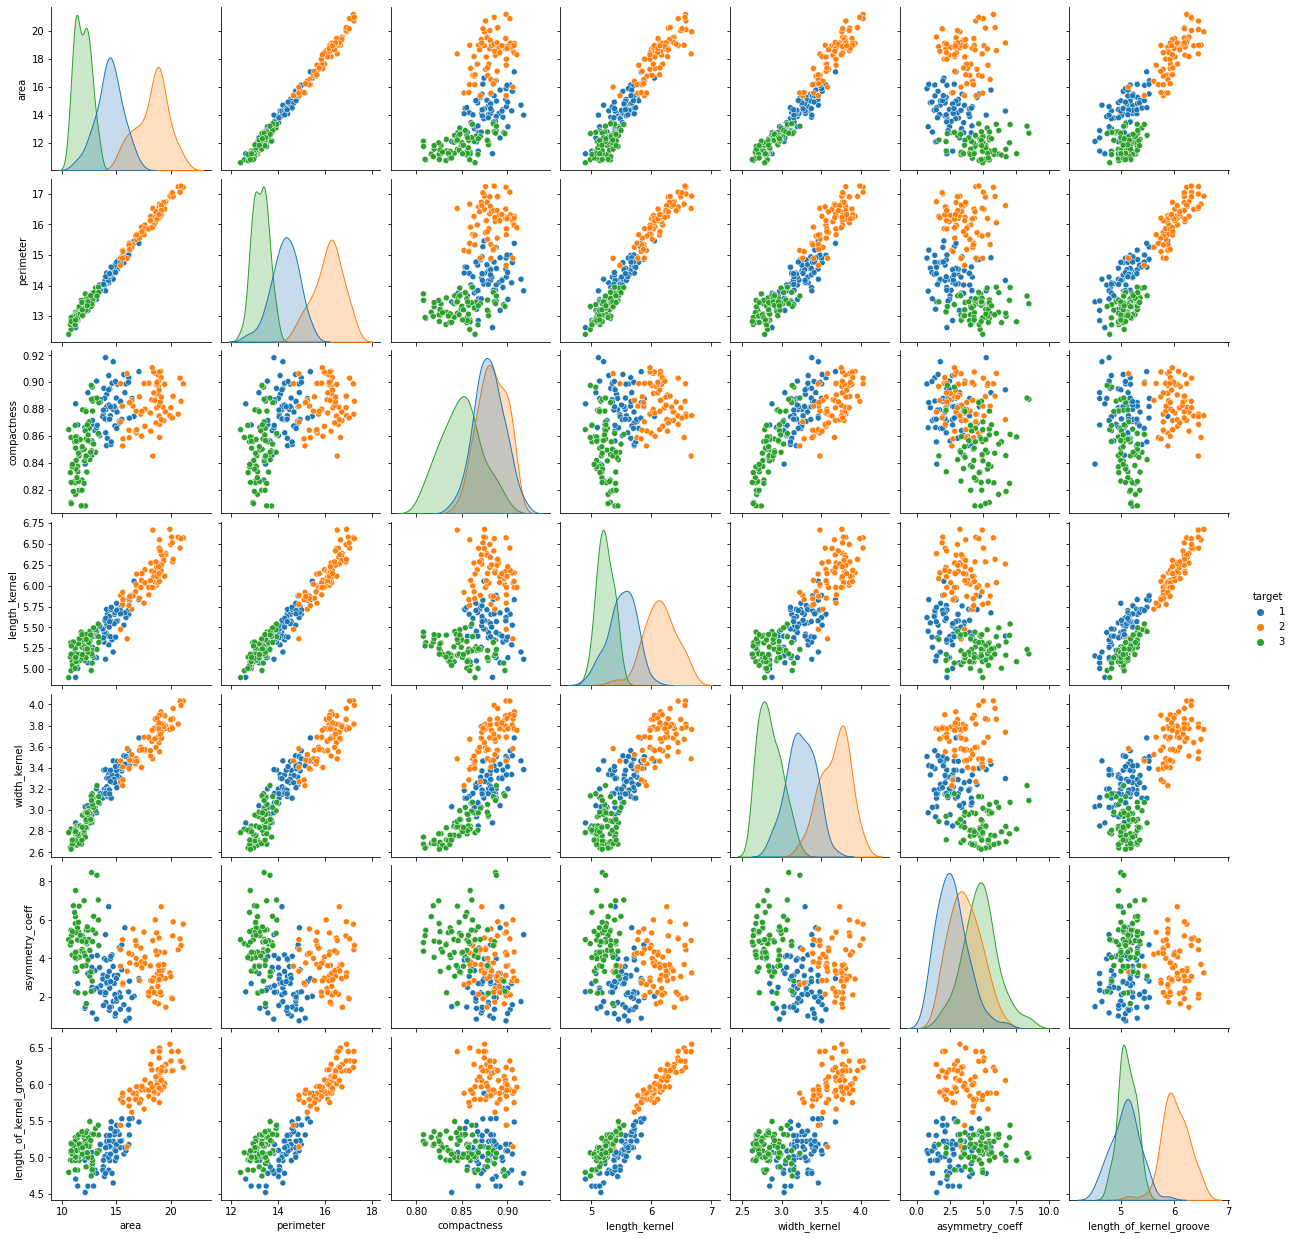

In [9]:
sns.pairplot(df, hue='target',palette='tab10');

From the pair plot, 
1. Columns Area and Perimeter seem to be highly correlated.
2. Using the column "length_of_kernel_groove", seed type "Rosa" easily classified.
3. Columns Area and Width also seem to be strongly correlated.

In [10]:
df[df['length_of_kernel_groove'].isnull()]

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove,target
7,14.11,14.1,0.8911,5.42,3.302,2.75,NaN,1


The above row in the data has the missing value in the column "length_of_kernel_groove". We are replacing the missing value with the median of the same column corresponding to a particular target.
For continuous data, mean is influenced by outliers and so we used median to replace the missing values.

In [11]:
df_1 = df[df.target==1]
df_1_new =df_1.fillna(df_1.median())
df_2 = df[df.target==2]
df_3 = df[df.target==3]
df_final=df_1_new.append([df_2,df_3])
df_final.describe()

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700439,5.408533,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503402,0.491141,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045250,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


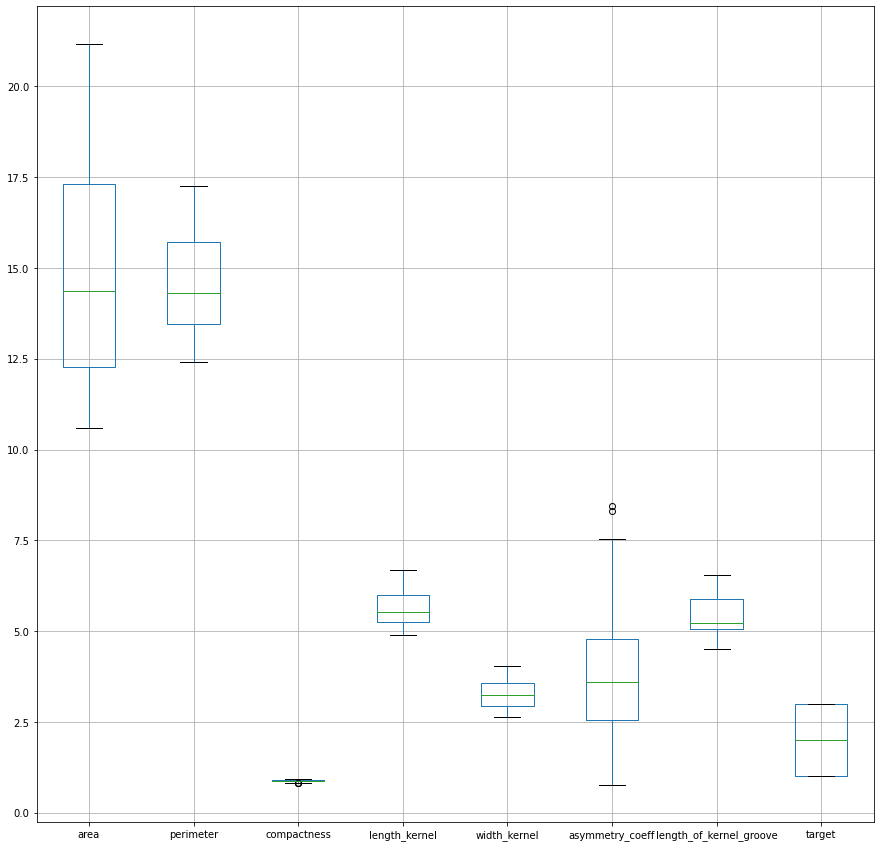

In [12]:
fig, ax = plt.subplots(figsize=(15,15))
df_final.boxplot(column=None, ax=ax);

From the above boxplot, we noticed that there are outliers in the columns compactness and asymmetry_coeff. We are replacing the outliers with the nearest boundary values (upper or lower)

In [13]:
cont = ['compactness','asymmetry_coeff'] 
for x in cont:
    df_final.sort_values(by=x)
    x_data = df_final[x]
    quantile1, quantile3= np.percentile(x_data,[25,75])
    iqr_value = quantile3-quantile1
    outliers = df_final[(x_data < quantile1 - (iqr_value * 1.5)) | (x_data > quantile3 + (iqr_value * 1.5))]
    #print(outliers)
    df_final[x] = np.where(df[x]<(quantile1 - (iqr_value * 1.5)), quantile1 - (iqr_value * 1.5), df_final[x])
    df_final[x] = np.where(df[x]>(quantile3 + (iqr_value * 1.5)), quantile3 + (iqr_value * 1.5), df_final[x]) 

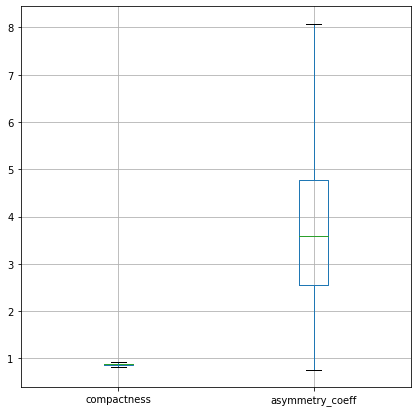

In [14]:
fig, ax = plt.subplots(figsize=(7,7))
df_final.boxplot(column=['compactness','asymmetry_coeff'], ax=ax);

In [15]:
#Dividiing each dataset into features(X) and target(Y)
target=["target"]
cols=[col for col in df_final.columns if col not in target]

x=df_final[cols]
y=df_final[target]

In [16]:
round(x.corr(method='pearson'),2)

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove
area,1.00,0.99,0.61,0.95,0.97,-0.23,0.86
perimeter,0.99,1.00,0.53,0.97,0.94,-0.22,0.89
compactness,0.61,0.53,1.00,0.37,0.76,-0.33,0.23
length_kernel,0.95,0.97,0.37,1.00,0.86,-0.17,0.93
width_kernel,0.97,0.94,0.76,0.86,1.00,-0.26,0.75
asymmetry_coeff,-0.23,-0.22,-0.33,-0.17,-0.26,1.00,-0.01
length_of_kernel_groove,0.86,0.89,0.23,0.93,0.75,-0.01,1.00


From the above table, area & perimeter = 0.99, area & width_kernel = 0.97, area & length_kernel = 0.95 seem to be highy correlated.
Hence we can drop one column i.e. "Area" here which is highly correlated with 3 other columns.
Analysis has been done with and without reduced features.

## 1. Analysis with reduced features without normalization

In [17]:
df_final_feature = df_final.drop(['area'], axis=1)

target=["target"]
cols_f=[col for col in df_final_feature.columns if col not in target]
cols_f

x_f=df_final_feature[cols_f]
y_f=df_final_feature[target]

In [18]:
#splitting the dataset into train, test and using train for cross validation
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(x_f, y_f, test_size = 0.2, random_state = 275)

  Max_depth  Mean Accuracy
0         3         0.9471
1         5         0.9529
2        10         0.9529
3      None         0.9529


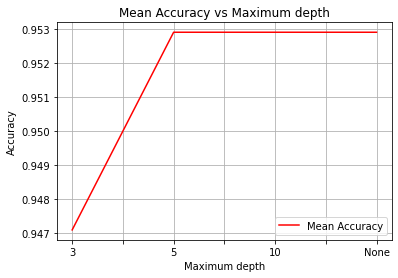

In [19]:
def dt_classifier(depth=None,min_leaf=1):
    DTclassifier = DecisionTreeClassifier(random_state = 0,max_depth=depth,min_samples_leaf=min_leaf)
    scores = cross_val_score(DTclassifier, x_train_f, y_train_f, cv=10)
    acc=round(scores.mean(),4)
    return acc

depth=[]
res=[]
res.append(dt_classifier(depth=3))
depth.append(3)
res.append(dt_classifier(depth=5))
depth.append(5)
res.append(dt_classifier(depth=10))
depth.append(10)
res.append(dt_classifier())
depth.append('None')
a=list(zip(depth,res))
df_dt_acc = pd.DataFrame(a, columns = ['Max_depth', 'Mean Accuracy'])
print(df_dt_acc)

#Plot graph for different maximum depth values and corresponding accuracy scores
df_dt_acc.plot(x='Max_depth', y='Mean Accuracy', color='red');
plt.grid();
plt.title('Mean Accuracy vs Maximum depth');
plt.xlabel('Maximum depth');
plt.ylabel('Accuracy');

Mean accuracies of Decision Tree for differnt values of max_depth has been plotted and it is observed that mean accuracy increased with increase in max_depth and is constant after certain depth.

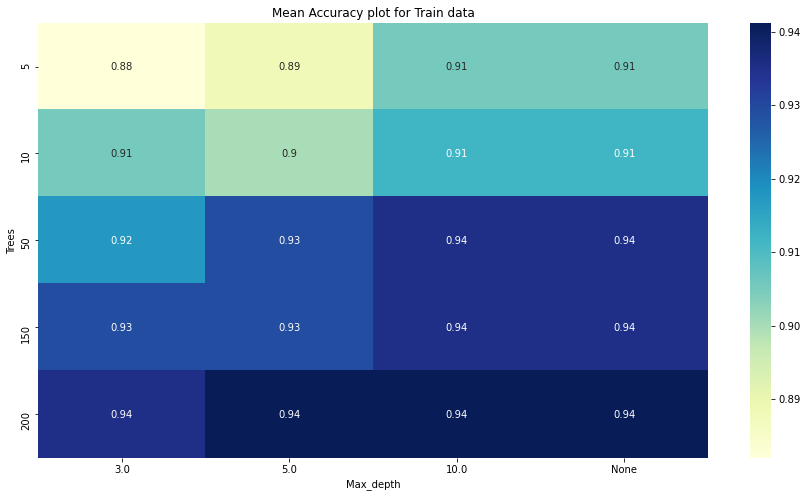

In [20]:
def rf_classifier(estimators,max_depth=None):
    RFclassifier = RandomForestClassifier(n_estimators=estimators,random_state = 0,max_depth=max_depth)
    scores = cross_val_score(RFclassifier, x_train_f, y_train_f.values.ravel(), cv=10)
    acc=round(scores.mean(),4)
    return acc

trees = [5, 10, 50, 150, 200]
depth = [3, 5, 10, None]
tree_depth_acc=[]
for i in trees:
    for j in depth:
        tree_depth_acc.append([i,j,rf_classifier(estimators=i,max_depth=j)])
df_rf_acc = pd.DataFrame(tree_depth_acc, columns = ['Trees', 'Max_depth','Mean Accuracy'])
df_rf_acc.replace(np.nan,'None',inplace=True)

df_rf_acc=df_rf_acc.pivot(index='Trees',columns='Max_depth',values='Mean Accuracy')
#Plotting the graph
plt.figure(figsize=(15,8))
sns.heatmap(data=df_rf_acc,annot=True,cmap="YlGnBu")
plt.title("Mean Accuracy plot for Train data")
plt.show()

Mean accuracies of Random Forest classifier for different values of max_depth and no of trees has been plotted as heat map and it is observed that mean accuracy increased with increase in no of trees and also increase in max_depth.

   Estimators  Mean Accuracy
0           5         0.9471
1          10         0.9412
2          50         0.9349
3         150         0.9471
4         200         0.9588


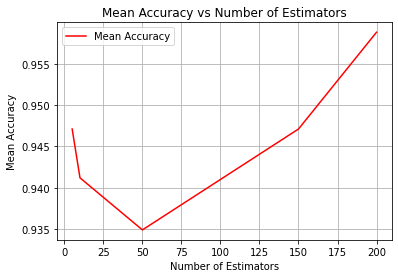

In [21]:
def gb_classifier(estimators):
    gbclassifier = GradientBoostingClassifier(n_estimators=estimators,random_state = 0)
    scores = cross_val_score(gbclassifier, x_train_f, y_train_f.values.ravel(), cv=10)
    acc=round(scores.mean(),4)
    return acc

bstages = [5, 10, 50, 150, 200]
bstages_acc=[]
for i in bstages:
    bstages_acc.append([i,gb_classifier(estimators=i)])
df_gb_acc = pd.DataFrame(bstages_acc, columns = ['Estimators','Mean Accuracy'])
print(df_gb_acc)

#Plot graph for different number of estimators and corresponding accuracy scores
df_gb_acc.plot(x='Estimators', y='Mean Accuracy', color='red');
plt.grid();
plt.title('Mean Accuracy vs Number of Estimators');
plt.xlabel('Number of Estimators');
plt.ylabel('Mean Accuracy');

Mean accuracies of GB classifier for different values of estimators has been plotted and it is observed that mean accuracy decreased till 50 and increased as estimators increased.

## 2. Analysis with reduced features and Normalization

In [22]:
scalar = MinMaxScaler()
X_train_f = scalar.fit_transform(x_train_f)
X_test_f = scalar.transform(x_test_f)

  Max_depth  Mean Accuracy
0         3         0.9471
1         5         0.9529
2        10         0.9529
3      None         0.9529


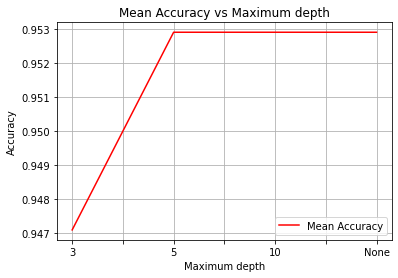

In [23]:
def dt_classifier(depth=None,min_leaf=1):
    DTclassifier = DecisionTreeClassifier(random_state = 0,max_depth=depth,min_samples_leaf=min_leaf)
    scores = cross_val_score(DTclassifier, X_train_f, y_train_f, cv=10)
    acc=round(scores.mean(),4)
    return acc

depth=[]
res=[]
res.append(dt_classifier(depth=3))
depth.append(3)
res.append(dt_classifier(depth=5))
depth.append(5)
res.append(dt_classifier(depth=10))
depth.append(10)
res.append(dt_classifier())
depth.append('None')
a=list(zip(depth,res))
df_dt_acc = pd.DataFrame(a, columns = ['Max_depth', 'Mean Accuracy'])
print(df_dt_acc)

#Plot graph for different maximum depth values and corresponding accuracy scores
df_dt_acc.plot(x='Max_depth', y='Mean Accuracy', color='red');
plt.grid();
plt.title('Mean Accuracy vs Maximum depth');
plt.xlabel('Maximum depth');
plt.ylabel('Accuracy');

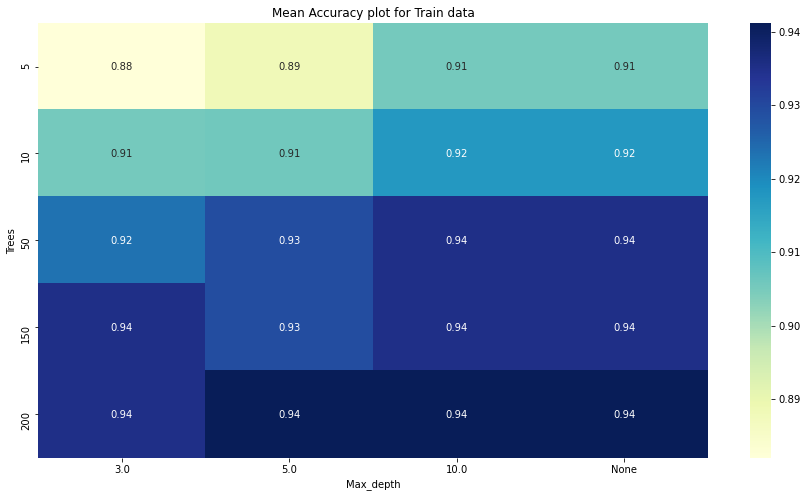

In [24]:
def rf_classifier(estimators,max_depth=None):
    RFclassifier = RandomForestClassifier(n_estimators=estimators,random_state = 0,max_depth=max_depth)
    scores = cross_val_score(RFclassifier, X_train_f, y_train_f.values.ravel(), cv=10)
    acc=round(scores.mean(),4)
    return acc

trees = [5, 10, 50, 150, 200]
depth = [3, 5, 10, None]
tree_depth_acc=[]
for i in trees:
    for j in depth:
        tree_depth_acc.append([i,j,rf_classifier(estimators=i,max_depth=j)])
df_rf_acc = pd.DataFrame(tree_depth_acc, columns = ['Trees', 'Max_depth','Mean Accuracy'])
df_rf_acc.replace(np.nan,'None',inplace=True)

df_rf_acc=df_rf_acc.pivot(index='Trees',columns='Max_depth',values='Mean Accuracy')
#Plotting the graph
plt.figure(figsize=(15,8))
sns.heatmap(data=df_rf_acc,annot=True,cmap="YlGnBu")
plt.title("Mean Accuracy plot for Train data")
plt.show()

   Estimators  Mean Accuracy
0           5         0.9471
1          10         0.9412
2          50         0.9349
3         150         0.9471
4         200         0.9588


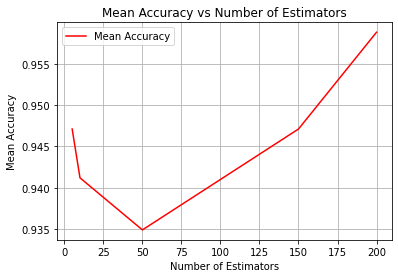

In [25]:
def gb_classifier(estimators):
    gbclassifier = GradientBoostingClassifier(n_estimators=estimators,random_state = 0)
    scores = cross_val_score(gbclassifier, X_train_f, y_train_f.values.ravel(), cv=10)
    acc=round(scores.mean(),4)
    return acc

bstages = [5, 10, 50, 150, 200]
bstages_acc=[]
for i in bstages:
    bstages_acc.append([i,gb_classifier(estimators=i)])
df_gb_acc = pd.DataFrame(bstages_acc, columns = ['Estimators','Mean Accuracy'])
print(df_gb_acc)

#Plot graph for different number of estimators and corresponding accuracy scores
df_gb_acc.plot(x='Estimators', y='Mean Accuracy', color='red');
plt.grid();
plt.title('Mean Accuracy vs Number of Estimators');
plt.xlabel('Number of Estimators');
plt.ylabel('Mean Accuracy');

## 3. Analysis with all features and without normalization

In [26]:
target=["target"]
cols=[col for col in df_final.columns if col not in target]

x=df_final[cols]
y=df_final[target]
#splitting the dataset into train, test and using train for cross validation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 275)

  Max_depth  Mean Accuracy
0         3         0.9228
1         5         0.9349
2        10         0.9165
3      None         0.9165


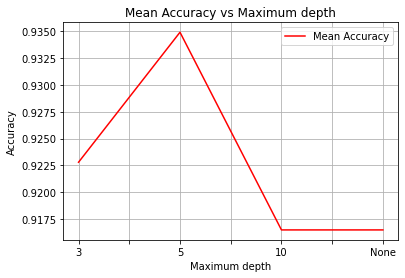

In [27]:
def dt_classifier(depth=None,min_leaf=1):
    DTclassifier = DecisionTreeClassifier(random_state = 0,max_depth=depth,min_samples_leaf=min_leaf)
    scores = cross_val_score(DTclassifier, x_train, y_train, cv=10)
    acc=round(scores.mean(),4)
    return acc

depth=[]
res=[]
res.append(dt_classifier(depth=3))
depth.append(3)
res.append(dt_classifier(depth=5))
depth.append(5)
res.append(dt_classifier(depth=10))
depth.append(10)
res.append(dt_classifier())
depth.append('None')
a=list(zip(depth,res))
df_dt_acc = pd.DataFrame(a, columns = ['Max_depth', 'Mean Accuracy'])
print(df_dt_acc)

#Plot graph for different maximum depth values and corresponding accuracy scores
df_dt_acc.plot(x='Max_depth', y='Mean Accuracy', color='red');
plt.grid();
plt.title('Mean Accuracy vs Maximum depth');
plt.xlabel('Maximum depth');
plt.ylabel('Accuracy');

Mean accuracies of Decision Tree for differnt values of max_depth has been plotted and it is observed that mean accuracy increased with increase in max_depth, reduced after a certain value and remained constant.

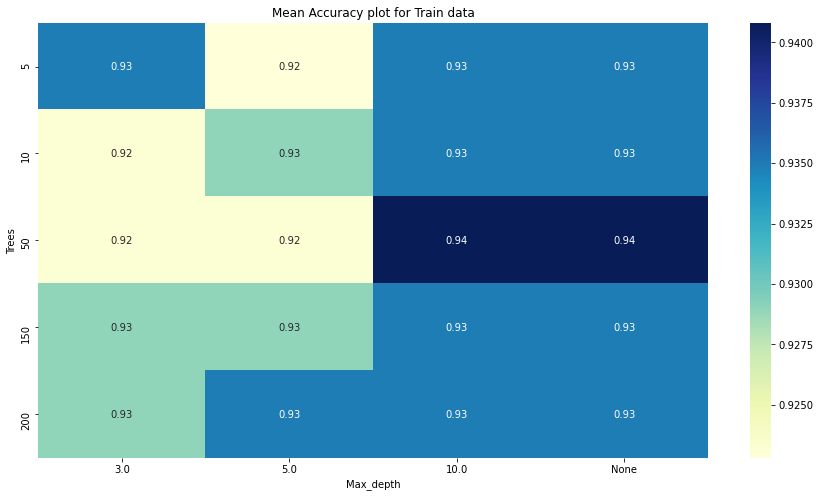

In [28]:
def rf_classifier(estimators,max_depth=None):
    RFclassifier = RandomForestClassifier(n_estimators=estimators,random_state = 0,max_depth=max_depth)
    scores = cross_val_score(RFclassifier, x_train, y_train.values.ravel(), cv=10)
    acc=round(scores.mean(),4)
    return acc

trees = [5, 10, 50, 150, 200]
depth = [3, 5, 10, None]
tree_depth_acc=[]
for i in trees:
    for j in depth:
        tree_depth_acc.append([i,j,rf_classifier(estimators=i,max_depth=j)])
df_rf_acc = pd.DataFrame(tree_depth_acc, columns = ['Trees', 'Max_depth','Mean Accuracy'])
df_rf_acc.replace(np.nan,'None',inplace=True)

df_rf_acc=df_rf_acc.pivot(index='Trees',columns='Max_depth',values='Mean Accuracy')
#Plotting the graph
plt.figure(figsize=(15,8))
sns.heatmap(data=df_rf_acc,annot=True,cmap="YlGnBu")
plt.title("Mean Accuracy plot for Train data")
plt.show()

Mean accuracies of Random Forest classifier for different values of max_depth and no of trees has been plotted as heat map and it is observed that mean accuracy increased with increase in no of trees and max_depth, reached the highest value and then decreased further.

   Estimators  Mean Accuracy
0           5         0.9290
1          10         0.9349
2          50         0.9467
3         150         0.9526
4         200         0.9526


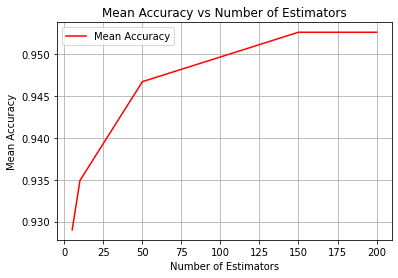

In [29]:
def gb_classifier(estimators):
    gbclassifier = GradientBoostingClassifier(n_estimators=estimators,random_state = 0)
    scores = cross_val_score(gbclassifier, x_train, y_train.values.ravel(), cv=10)
    acc=round(scores.mean(),4)
    return acc

bstages = [5, 10, 50, 150, 200]
bstages_acc=[]
for i in bstages:
    bstages_acc.append([i,gb_classifier(estimators=i)])
df_gb_acc = pd.DataFrame(bstages_acc, columns = ['Estimators','Mean Accuracy'])
print(df_gb_acc)

#Plot graph for different number of estimators and corresponding accuracy scores
df_gb_acc.plot(x='Estimators', y='Mean Accuracy', color='red');
plt.grid();
plt.title('Mean Accuracy vs Number of Estimators');
plt.xlabel('Number of Estimators');
plt.ylabel('Mean Accuracy');

Mean accuracies of GB classifier for different values of estimators has been plotted and it is observed that mean accuracy increased as estimators increased.

## 4. Analysis with all the features and using Normalization

  Max_depth  Mean Accuracy
0         3         0.9228
1         5         0.9349
2        10         0.9165
3      None         0.9165


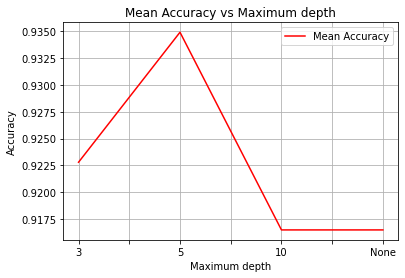

In [30]:
scalar = MinMaxScaler()
X_train = scalar.fit_transform(x_train)
X_test = scalar.transform(x_test)
def dt_classifier(depth=None,min_leaf=1):
    DTclassifier = DecisionTreeClassifier(random_state = 0,max_depth=depth,min_samples_leaf=min_leaf)
    #DTclassifier.fit(X_train,y_train)
    scores = cross_val_score(DTclassifier, X_train, y_train, cv=10)
    acc=round(scores.mean(),4)
    return acc

depth=[]
res=[]
res.append(dt_classifier(depth=3))
depth.append(3)
res.append(dt_classifier(depth=5))
depth.append(5)
res.append(dt_classifier(depth=10))
depth.append(10)
res.append(dt_classifier())
depth.append('None')
a=list(zip(depth,res))
df_dt_acc = pd.DataFrame(a, columns = ['Max_depth', 'Mean Accuracy'])
print(df_dt_acc)

#Plot graph for different maximum depth values and corresponding accuracy scores
df_dt_acc.plot(x='Max_depth', y='Mean Accuracy', color='red');
plt.grid();
plt.title('Mean Accuracy vs Maximum depth');
plt.xlabel('Maximum depth');
plt.ylabel('Accuracy');

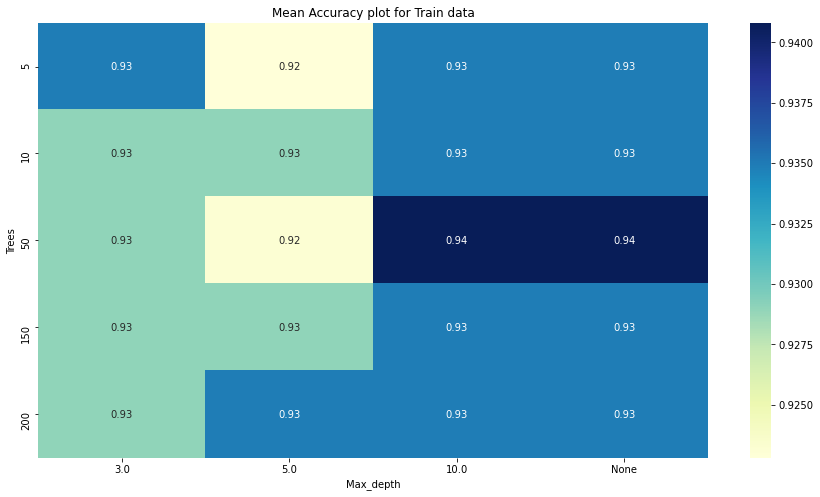

In [31]:
def rf_classifier(estimators,max_depth=None):
    RFclassifier = RandomForestClassifier(n_estimators=estimators,random_state = 0,max_depth=max_depth)
    scores = cross_val_score(RFclassifier, X_train, y_train.values.ravel(), cv=10)
    acc=round(scores.mean(),4)
    return acc

trees = [5, 10, 50, 150, 200]
depth = [3, 5, 10, None]
tree_depth_acc=[]
for i in trees:
    for j in depth:
        tree_depth_acc.append([i,j,rf_classifier(estimators=i,max_depth=j)])
df_rf_acc = pd.DataFrame(tree_depth_acc, columns = ['Trees', 'Max_depth','Mean Accuracy'])
df_rf_acc.replace(np.nan,'None',inplace=True)

df_rf_acc=df_rf_acc.pivot(index='Trees',columns='Max_depth',values='Mean Accuracy')
#Plotting the graph
plt.figure(figsize=(15,8))
sns.heatmap(data=df_rf_acc,annot=True,cmap="YlGnBu")
plt.title("Mean Accuracy plot for Train data")
plt.show()

   Estimators  Mean Accuracy
0           5         0.9290
1          10         0.9349
2          50         0.9467
3         150         0.9526
4         200         0.9526


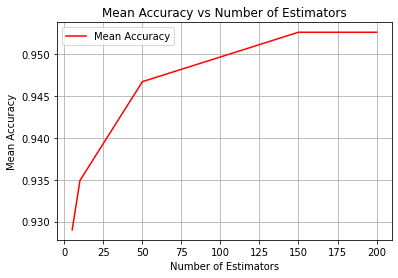

In [32]:
def gb_classifier(estimators):
    gbclassifier = GradientBoostingClassifier(n_estimators=estimators,random_state = 0)
    scores = cross_val_score(gbclassifier, X_train, y_train.values.ravel(), cv=10)
    acc=round(scores.mean(),4)
    return acc

bstages = [5, 10, 50, 150, 200]
bstages_acc=[]
for i in bstages:
    bstages_acc.append([i,gb_classifier(estimators=i)])
df_gb_acc = pd.DataFrame(bstages_acc, columns = ['Estimators','Mean Accuracy'])
print(df_gb_acc)

#Plot graph for different number of estimators and corresponding accuracy scores
df_gb_acc.plot(x='Estimators', y='Mean Accuracy', color='red');
plt.grid();
plt.title('Mean Accuracy vs Number of Estimators');
plt.xlabel('Number of Estimators');
plt.ylabel('Mean Accuracy');

## Analysis and Discussion 

### Decision Tree

From the four different analyis above, we noticed that the Decision tree classifier gave maximum mean accuracy when we considered reduced features. Max accuracy was obtained for max_depths 5, 10 and None.

Taking max_depth too high, the decision tree might overfit. If the depth is too low, the decision tree might not capture all the patterns and interactions in the training data leading to underfit.

Hence, we are considering the best value for maximum depth as 5.

We noticed that normalization of the data did not have any effect on the mean accuracy of the DT Classifier. This is because in Descision Tree, the features are selected and splits are made based on gini impurity or entropy and hence scaling does not effect DT classifier as it is an information gain based algorithm. Scaling is primarily used in similarity based algorithms.

### Perfomance of DT on test data

In [33]:
DTclassifier = DecisionTreeClassifier(random_state = 0,max_depth=5)
DTclassifier.fit(x_train_f,y_train_f)
y_predicted=DTclassifier.predict(x_test_f)
res = round(accuracy_score(y_test_f,y_predicted),4)
res

0.8095

### Analyzing the splitting rules the tree learnt

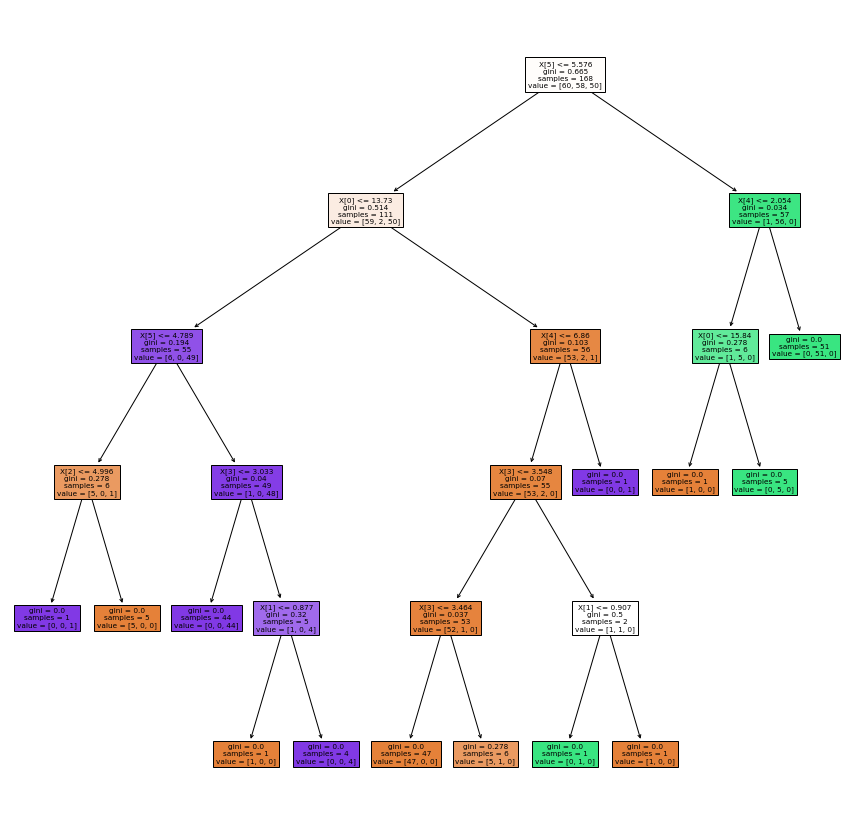

In [34]:
plt.figure(figsize=(15,15))
tree.plot_tree(DTclassifier,filled=True);

From the above decision tree, examining the final resulting splitting rules used for the trees, below are the patterns observed:
1. Column "length_of_kernel_groove" has been choosen as the root node and the split has been made at "5.576" based on gini impurity.
2. This split helped to differentiate the targets Kama (1), Rosa (2) from  Canadian (3). This means all the seeds with "length_of_kernel_groove" greater than 5.576 are not canadian.
3. We infer that if "length_of_kernel_groove" > 5.576 and "perimeter" > 15.84, the seed is Rosa.
4. We infer that if "length_of_kernel_groove" <= 5.576,"perimeter" > 13.73 and "asymmetry coefficient" > 6.86,  the seed is Canadian.
5. We infer that if "length_of_kernel_groove" <= 5.576, "perimeter" > 13.73,"asymmetry coefficient" <= 6.86 and "width of kernel" <= 3.464 the seed is Kama.

### Random Forest

From the four different analyis above, we noticed that the Random Forest classifier gives maximum mean accuracy with all features at maximum depth 10 and number of trees 50 and also with reduced features at maximum depth 5 and number of trees 200. Since increasing the number of trees decreases the variance and a good classifier should have optimal variance and bias, we choose depth 5 and 200 trees with reduced features. Hence, we are considering the best value for maximum depth as 5 and number of trees as 200.

We noticed that normalization of the data did not have any effect on the mean accuracy of the RF Classifier. This is because Random Forest classifier is an information gain based algorithm and scaling is primarily used in similarity based algorithms

### Perfomance of RF on test data

In [35]:
RFclassifier = RandomForestClassifier(n_estimators=200,random_state = 0,max_depth=5)
RFclassifier.fit(x_train_f,y_train_f.values.ravel())
y_predicted=RFclassifier.predict(x_test_f)
res = round(accuracy_score(y_test_f,y_predicted),4)
res

0.8095

### Gradient Tree Boosting

From the four different analyis above, we noticed that the GB classifier gives maximum mean accuracy with reduced features at number of estimators as 200. Hence, we are considering the best value for number of estimators as 200.

As GB classifer is also one of the ensemble methods, scaling the data did not have any effect on the mean accuracy.

### Perfomance of GB on test data

In [36]:
gbclassifier = GradientBoostingClassifier(n_estimators=200,random_state = 0)
gbclassifier.fit(x_train_f,y_train_f.values.ravel())
y_predicted=gbclassifier.predict(x_test_f)
res = round(accuracy_score(y_test_f,y_predicted),4)
res

0.8095

## PART 2 CM3

##### For the three classifiers DT, RF and GB. Below is our analysis on train and test datasets.

Considering all the features present in the data:
1. Using cross validation - Decision Tree (DT) classifier, Random Forest (RF) classifier and Gradient Boosting (GB) classifier gave maximum mean accuracies of 93.49, 94.32 and 95.26 respectively. 
2. We noticed that GB classifier outperformed DT and RF. GB classifier builds trees one at a time, where each new tree helps to correct errors made by previously trained tree.
3. RF too performed well when compared to DT as RF is a collection of many DTs reducing variance and increasing accuracy.

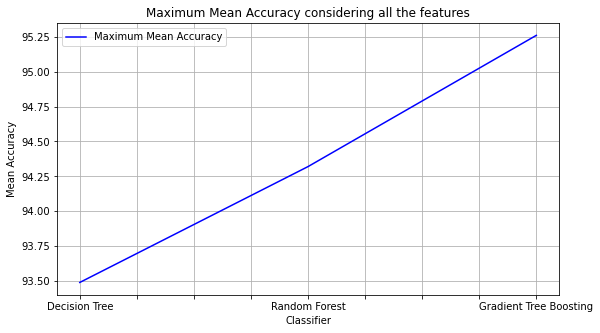

In [37]:
all_fea_meanacc = [["Decision Tree",93.49],["Random Forest",94.32],["Gradient Tree Boosting",95.26]]
all_fea_meanacc1 = pd.DataFrame(all_fea_meanacc, columns = ['Classifier','Maximum Mean Accuracy'])
all_fea_meanacc1.plot(x='Classifier', y='Maximum Mean Accuracy', color='blue',figsize=(9,5));
plt.grid();
plt.title('Maximum Mean Accuracy considering all the features');
plt.ylabel('Mean Accuracy');

Considering the reduced features:
1. Using cross validation - Decision Tree (DT) classifier, Random Forest (RF) classifier and Gradient Boosting (GB) classifier gave maximum mean accuracies of 95.29, 94.35 and 95.88 respectively.
2. Usually increasing the no of tress in the model i.e using RF should give higher accuracy than DT. However, here with reduced features DT performed well compared to RF. 
3. As expected, GB classifier outperformed DT and RF.

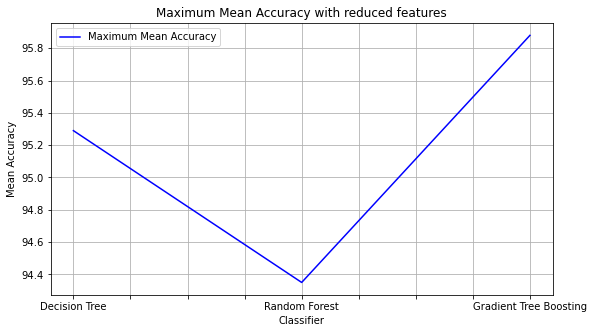

In [38]:
all_fea_meanacc = [["Decision Tree",95.29],["Random Forest",94.35],["Gradient Tree Boosting",95.88]]
all_fea_meanacc1 = pd.DataFrame(all_fea_meanacc, columns = ['Classifier','Maximum Mean Accuracy'])
all_fea_meanacc1.plot(x='Classifier', y='Maximum Mean Accuracy', color='blue',figsize=(9,5));
plt.grid();
plt.title('Maximum Mean Accuracy with reduced features');
plt.ylabel('Mean Accuracy');

### Performance of classifiers on Test data

Since reducing the features in the dataset gave better mean accuracies, we have considered the same dataset to train the models and test the perfomance.

1. DT Classifier, RF Classifier and GB Classifier gave equal accuracy of 80.95 on the test data. The mean accuracies of the classifiers using CV on the train data was as per our expectations. However, on test data RF and GB did not really perform well.
2. The reason could be that, when the dataset is small, decision tree might have been reasonably stable and in such cases, other ensemble methods return the same prediction and hence the perfomance of DT and RF on test data is the same.

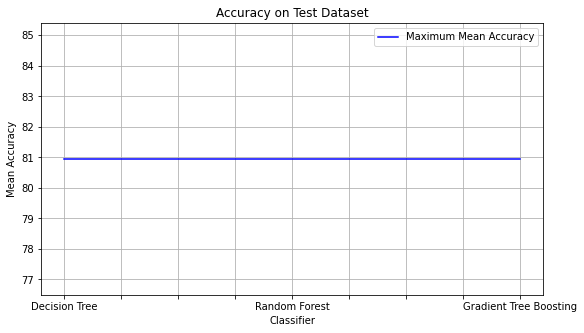

In [39]:
all_fea_meanacc = [["Decision Tree",80.95],["Random Forest",80.95],["Gradient Tree Boosting",80.95]]
all_fea_meanacc1 = pd.DataFrame(all_fea_meanacc, columns = ['Classifier','Maximum Mean Accuracy'])
all_fea_meanacc1.plot(x='Classifier', y='Maximum Mean Accuracy', color='blue',figsize=(9,5));
plt.grid();
plt.title('Accuracy on Test Dataset');
plt.ylabel('Mean Accuracy');

## Question 2: Naive Bayes Classifier 

## Part 1 CM4

## 1. Analysis with reduced features - Naive Bayes

In [40]:
def nb_classifier(var_smooth):
    nbclassifier = GaussianNB(var_smoothing=var_smooth)
    nbclassifier.fit(x_train_f,y_train_f.values.ravel())
    scores = cross_val_score(nbclassifier, x_train_f, y_train_f.values.ravel(), cv=10)
    acc_mean=scores.mean()
    n=nbclassifier.predict(x_test_f)
    acc = round(accuracy_score(y_test_f,n),2)
    fscore=round(f1_score(y_test_f, n, average='macro'),2)
    return acc_mean,fscore,acc

smooth = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
smooth_acc=[]
for i in smooth:
    x,y,z=nb_classifier(var_smooth=i)
    smooth_acc.append([i,x])
df_nb_acc = pd.DataFrame(smooth_acc, columns = ['Smoothing_Value','Mean Accuracy'])
df_nb_acc

,Smoothing_Value,Mean Accuracy
0,1.000000e-10,0.917279
1,1.000000e-09,0.917279
2,1.000000e-05,0.917279
3,1.000000e-03,0.934926
4,1.000000e-01,0.911765


## 2. Analysis with reduced features and using standardization

In [41]:
scalar = StandardScaler()
X_train_f = scalar.fit_transform(x_train_f)
X_test_f = scalar.transform(x_test_f)
def nb_classifier(var_smooth):
    nbclassifier = GaussianNB(var_smoothing=var_smooth)
    nbclassifier.fit(X_train_f,y_train_f.values.ravel())
    scores = cross_val_score(nbclassifier, X_train_f, y_train_f.values.ravel(), cv=10)
    acc_mean=scores.mean()
    n=nbclassifier.predict(X_test_f)
    acc = round(accuracy_score(y_test_f,n),2)
    fscore=round(f1_score(y_test_f, n, average='macro'),2)
    return acc_mean,fscore,acc

smooth = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
smooth_acc=[]
for i in smooth:
    x,y,z=nb_classifier(var_smooth=i)
    smooth_acc.append([i,x])
df_nb_acc = pd.DataFrame(smooth_acc, columns = ['Smoothing_Value','Mean Accuracy'])
df_nb_acc

,Smoothing_Value,Mean Accuracy
0,1.000000e-10,0.917279
1,1.000000e-09,0.917279
2,1.000000e-05,0.917279
3,1.000000e-03,0.917279
4,1.000000e-01,0.917279


## 3. Analysis with all the features

In [42]:
def nb_classifier(var_smooth):
    nbclassifier = GaussianNB(var_smoothing=var_smooth)
    nbclassifier.fit(x_train,y_train.values.ravel())
    scores = cross_val_score(nbclassifier, x_train, y_train.values.ravel(), cv=10)
    acc_mean=scores.mean()
    n=nbclassifier.predict(x_test)
    acc = round(accuracy_score(y_test,n),2)
    fscore=round(f1_score(y_test, n, average='macro'),2)
    return acc_mean,fscore,acc

smooth = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
smooth_acc=[]
for i in smooth:
    x,y,z=nb_classifier(var_smooth=i)
    smooth_acc.append([i,x])
df_nb_acc = pd.DataFrame(smooth_acc, columns = ['Smoothing_Value','Mean Accuracy'])
df_nb_acc

,Smoothing_Value,Mean Accuracy
0,1.000000e-10,0.917279
1,1.000000e-09,0.917279
2,1.000000e-05,0.917279
3,1.000000e-03,0.929044
4,1.000000e-01,0.929412


## 4. Analysis with all features and using standardization

In [43]:
scalar = StandardScaler()
X_train = scalar.fit_transform(x_train)
X_test = scalar.transform(x_test)
def nb_classifier(var_smooth):
    nbclassifier = GaussianNB(var_smoothing=var_smooth)
    nbclassifier.fit(X_train,y_train.values.ravel())
    scores = cross_val_score(nbclassifier, X_train, y_train.values.ravel(), cv=10)
    acc_mean=scores.mean()
    n=nbclassifier.predict(X_test)
    acc = round(accuracy_score(y_test,n),2)
    fscore=round(f1_score(y_test, n, average='macro'),2)
    return acc_mean,fscore,acc

smooth = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
smooth_acc=[]
for i in smooth:
    x,y,z=nb_classifier(var_smooth=i)
    smooth_acc.append([i,x])
df_nb_acc = pd.DataFrame(smooth_acc, columns = ['Smoothing_Value','Mean Accuracy'])
df_nb_acc

,Smoothing_Value,Mean Accuracy
0,1.000000e-10,0.917279
1,1.000000e-09,0.917279
2,1.000000e-05,0.917279
3,1.000000e-03,0.917279
4,1.000000e-01,0.917279


From the above four different analysis, Naive Bayes classifier gave better mean accuracy score with reduced features and without scaling at smoothing value as 1.000000e-03. Considering the same value for test dataset below.

Also, we have observed that scaling did not have much variation in the mean accuracy.

### Performance of GNB on test data

In [44]:
nbclassifier = GaussianNB(var_smoothing=1.000000e-03)
nbclassifier.fit(x_train_f,y_train_f.values.ravel())
n=nbclassifier.predict(x_test_f)
acc = round(accuracy_score(y_test_f,n),4)
fscore=round(f1_score(y_test_f, n, average='macro'),4)
print("The Accuracy and F1 score of the classifier are {} and {} respectively".format(acc,fscore))

The Accuracy and F1 score of the classifier are 0.8571 and 0.8356 respectively


## Impact of smoothing parameter

From the analysis, Gaussian NB classifier gave maximum mean accuracy with reduced features at smoothing value "1e-3".

With the increase in the smoothing value, the mean accuracy of the classifier increased, reached the maximum at smoothing value "1e-3" and then decreased.
 

In general, categorical data having finite number of values, will have finite prior probabilities. However, continuous data has infinite number of possible vaues and the GaussianNB classifier for a given feature uses all the values observed to estimate the distribution. All of the infinite possible values of each feature would result in exceeding the number of actually observed data points by a infinite amount. This makes the Gaussian distributions estimated to represent all features the exact same for continuous data. 

Hence, the parameter "smoothing value" of Gaussion NB classifier did not have much impact on the mean accuracy since the data is continuous. 

## Part 2 CM6

For wheat seed dataset, considering the reduced features:
1. Using cross validation - Decision Tree (DT) classifier, Random Forest (RF) classifier, Gradient Boosting (GB) classifier and NB gave maximum mean accuracies of 95.29, 94.35, 95.88 and 93.49 respectively.
2. As expected, decision tree approaches gave better accuracies compared to NB as NB considers the features to be independent which rarely happens practically.

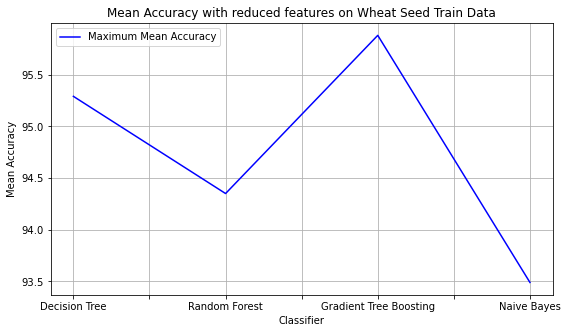

In [45]:
all_fea_meanacc = [["Decision Tree",95.29],["Random Forest",94.35],["Gradient Tree Boosting",95.88],["Naive Bayes",93.49]]
all_fea_meanacc1 = pd.DataFrame(all_fea_meanacc, columns = ['Classifier','Maximum Mean Accuracy'])
all_fea_meanacc1.plot(x='Classifier', y='Maximum Mean Accuracy', color='blue',figsize=(9,5));
plt.grid();
plt.title('Mean Accuracy with reduced features on Wheat Seed Train Data');
plt.ylabel('Mean Accuracy');

## Comparing the performance on test data

Since reducing the features in the dataset gave better mean accuracies, we have considered the same dataset to train the models and test the perfomance.

DT Classifier, RF Classifier and GB Classifier gave equal accuracy of 80.95 on the test data. whereas NB classifier gave the accuracy of 85.71. The mean accuracies of the classifiers using CV on the train data was as per our expectations. However, on test data NB outperformed other decision tree approaches.

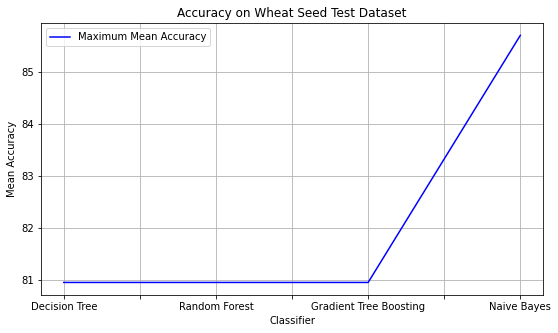

In [46]:
all_fea_meanacc = [["Decision Tree",80.95],["Random Forest",80.95],["Gradient Tree Boosting",80.95],["Naive Bayes",85.71]]
all_fea_meanacc1 = pd.DataFrame(all_fea_meanacc, columns = ['Classifier','Maximum Mean Accuracy'])
all_fea_meanacc1.plot(x='Classifier', y='Maximum Mean Accuracy', color='blue',figsize=(9,5));
plt.grid();
plt.title('Accuracy on Wheat Seed Test Dataset');
plt.ylabel('Mean Accuracy');

For COVID dataset:
1.  Using cross validation - Decision Tree (DT) classifier, Random Forest (RF) classifier, Gradient Boosting (GB) classifier and NB Classifier gave maximum mean accuracies of 65.57, 67.23, 65.52 and 65.23 respectively.
2. As expected, decision tree approaches gave better accuracies compared to NB as NB considers the features to be independent which rearely happens practically.

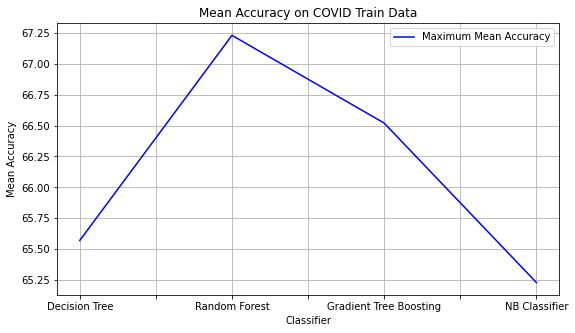

In [47]:
all_fea_meanacc = [["Decision Tree",65.57],["Random Forest",67.23],["Gradient Tree Boosting",66.52], ["NB Classifier",65.23]]
all_fea_meanacc1 = pd.DataFrame(all_fea_meanacc, columns = ['Classifier','Maximum Mean Accuracy'])
all_fea_meanacc1.plot(x='Classifier', y='Maximum Mean Accuracy', color='blue',figsize=(9,5));
plt.grid();
plt.title('Mean Accuracy on COVID Train Data');
plt.ylabel('Mean Accuracy');

## Comparing the performance on test data

On test data DT Classifier, RF Classifier, GB Classifier and NB Classifier gave accuracies of 66.78, 67.55, 66.88 and 67.08 on the test data. The mean accuracies of the classifiers using CV on the train data was as per our expectations. However, on test data RF outperformed other classifiers.

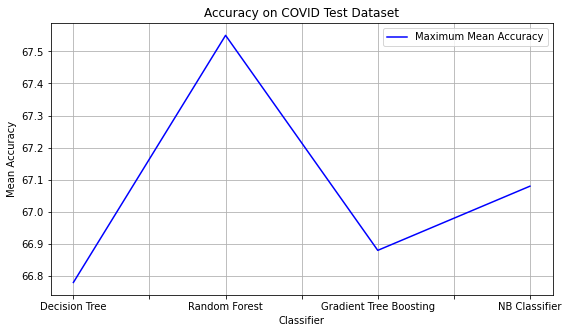

In [48]:
all_fea_meanacc = [["Decision Tree",66.78],["Random Forest",67.55],["Gradient Tree Boosting",66.88],["NB Classifier",67.08]]
all_fea_meanacc1 = pd.DataFrame(all_fea_meanacc, columns = ['Classifier','Maximum Mean Accuracy'])
all_fea_meanacc1.plot(x='Classifier', y='Maximum Mean Accuracy', color='blue',figsize=(9,5));
plt.grid();
plt.title('Accuracy on COVID Test Dataset');
plt.ylabel('Mean Accuracy');

Since we used a Gaussian Naive Bayes here, the learning parameters of it are mean and variance. Finding these values for the best smoothing value selected.

#### Wheat Seeds Dataset

In [49]:
nbclassifier = GaussianNB(var_smoothing=1.000000e-03)
nbclassifier.fit(x_train_f,y_train_f.values.ravel())
n=nbclassifier.predict(x_test_f)
print("Mean of each feature per class\n")
print(nbclassifier.theta_)

Mean of each feature per class

[[14.37033333  0.87938     5.53786667  3.25703333  2.70595333  5.11155   ]
 [16.13913793  0.8832569   6.13789655  3.67794828  3.51475862  6.01581034]
 [13.206       0.84999375  5.215       2.84834     4.728665    5.0952    ]]


In [50]:
print("Variance of each feature per class\n")
print(nbclassifier.sigma_)

Variance of each feature per class

[[0.27246909 0.00249063 0.04905148 0.0302607  1.50477541 0.07186771]
 [0.36923041 0.00243296 0.07221504 0.03440424 1.23099271 0.069557  ]
 [0.10301053 0.0026678  0.02109545 0.02358452 2.00054814 0.02808341]]


Rows in the above arrays corresponds to each target and each value in a particular row corresponds to a column.

It is observed that the mean values of column compactness(column 2) for all three kinds are closer to each other and mean values of column length of kernel groove for targets Kama & Canadian are almost same.

It is observed that there is a little difference in the variance of columns compactness (column 2) for all 3 targets.

Single Decision Tree model gave accuracy of 80.95% on test data whereas Gaussian NB gave an accuracy of 85.71%

Analyzing the results with confusioin matrix.

In [51]:
print("Confusion matrix - Gaussian Naive Bayes\n")
print(confusion_matrix(y_test_f,n))

Confusion matrix - Gaussian Naive Bayes

[[ 6  0  4]
 [ 1 11  0]
 [ 1  0 19]]


In [52]:
DTclassifier = DecisionTreeClassifier(random_state = 0,max_depth=5)
DTclassifier.fit(x_train_f,y_train_f)
y_predicted=DTclassifier.predict(x_test_f)

In [53]:
print("Confusion matrix - Decision tree\n")
print(confusion_matrix(y_test_f,y_predicted))

Confusion matrix - Decision tree

[[ 6  1  3]
 [ 0 12  0]
 [ 4  0 16]]


From the confusion martices, Decision tree was able to correctly identify all the rows that have target Rosa. Whereas Naive Bayes was able to correctly identify rows that have target as Canadian.